In [1]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv("data.csv")
df_right = df_raw[df_raw["Hand"] == "Right"]
df_left = df_raw[df_raw["Hand"] == "Left"]
df_both = df_raw[df_raw["Hand"] == "Both"]

In [3]:
xy_right = df_right[["x [cm]", "y [cm]"]].to_numpy()
mu_right = np.mean(xy_right, axis=0)
sigma_right = np.cov(xy_right.T)

xy_left = df_left[["x [cm]", "y [cm]"]].to_numpy()
mu_left = np.mean(xy_left, axis=0)
sigma_left = np.cov(xy_left.T)

xy_both = df_both[["x [cm]", "y [cm]"]].to_numpy()
mu_both = np.mean(xy_both, axis=0)
sigma_both = np.cov(xy_both.T)

mu_right, mu_left, mu_both

(array([-2.57166667, -0.33      ]),
 array([3.27666667, 1.375     ]),
 array([0.46666667, 0.86166667]))

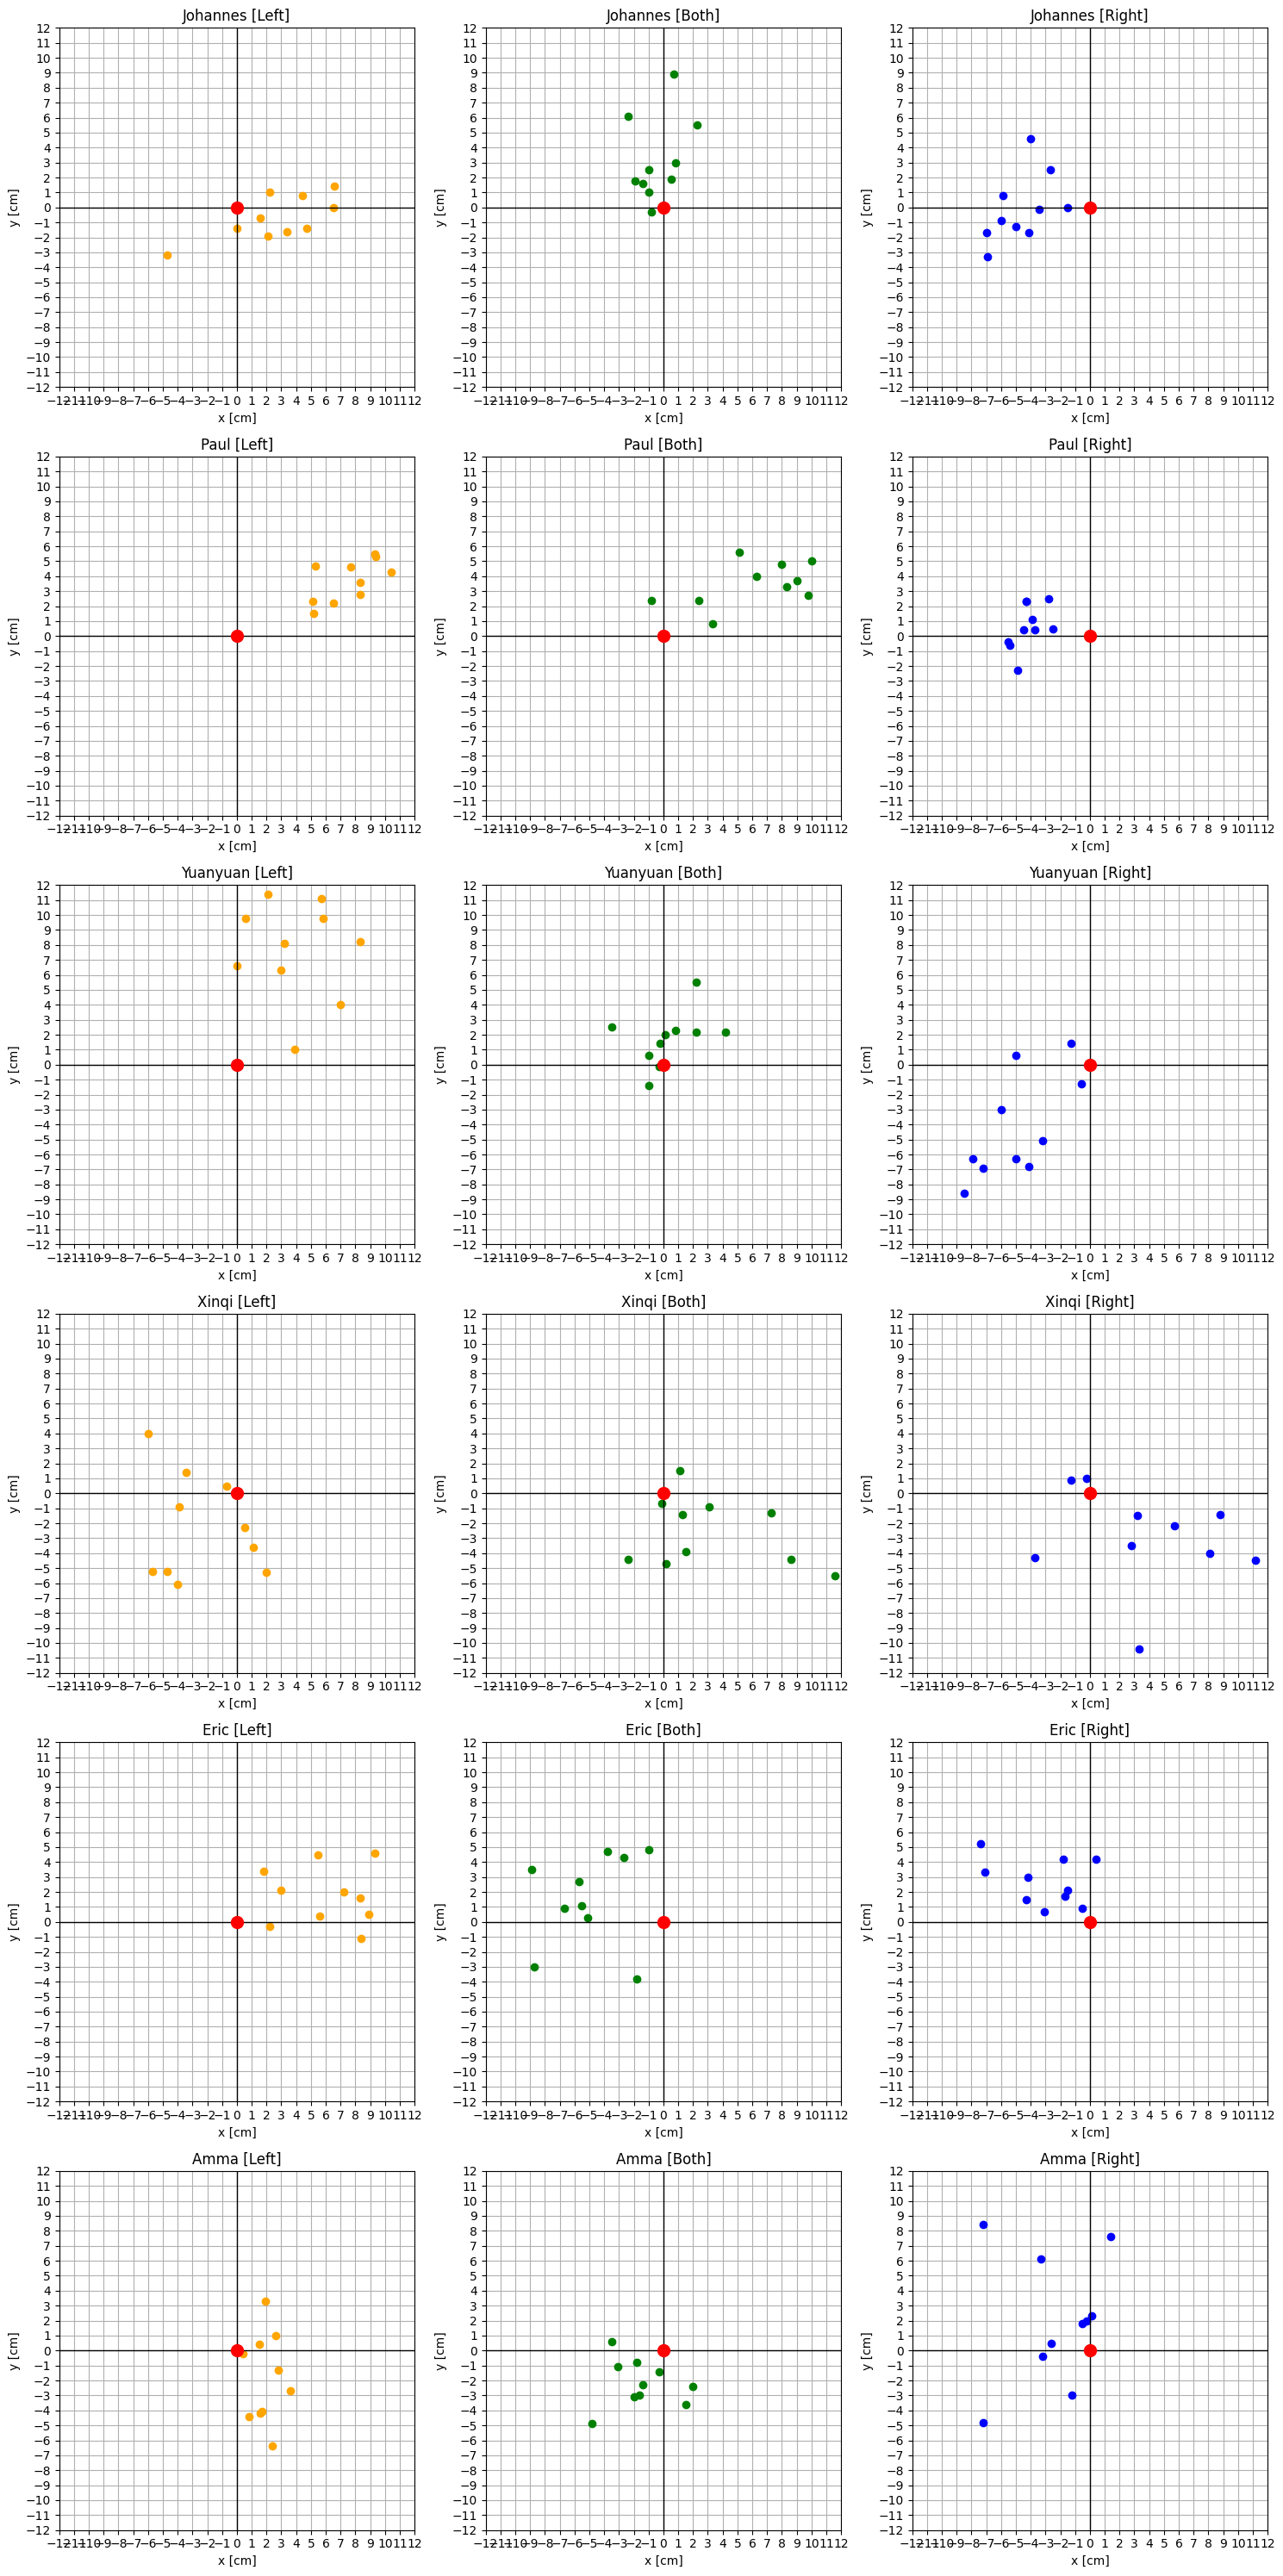

In [4]:
plot_size = 5
fig, ax = plt.subplots(
    nrows=len(df_right["Name"].unique()),
    ncols=3,
    figsize=(3 * plot_size, len(df_right["Name"].unique()) * plot_size),
)

colors = {"Right": "blue", "Left": "orange", "Both": "green"}
for i, (hand, df_hand) in enumerate(
    [("Left", df_left), ("Both", df_both), ("Right", df_right)]
):
    for j, name in enumerate(df_right["Name"].unique()):
        df = df_hand[df_hand["Name"] == name]

        # Plot
        ax[j, i].scatter(df["x [cm]"], df["y [cm]"], color=colors[hand], zorder=2)
        ax[j, i].set_title(f"{name} [{hand}]")
        ax[j, i].set_xlabel("x [cm]")
        ax[j, i].set_ylabel("y [cm]")

        # Coordinate System
        ax[j, i].set_xlim(-10, 10)
        ax[j, i].set_ylim(-10, 10)
        ax[j, i].set_xticks(np.arange(-12, 13, 1))
        ax[j, i].set_yticks(np.arange(-12, 13, 1))
        ax[j, i].axhline(0, color="black", linewidth=1)
        ax[j, i].axvline(0, color="black", linewidth=1)
        ax[j, i].grid(True)
        ax[j, i].scatter([0], [0], color="red", s=100, zorder=5)

plt.tight_layout()
plt.show()

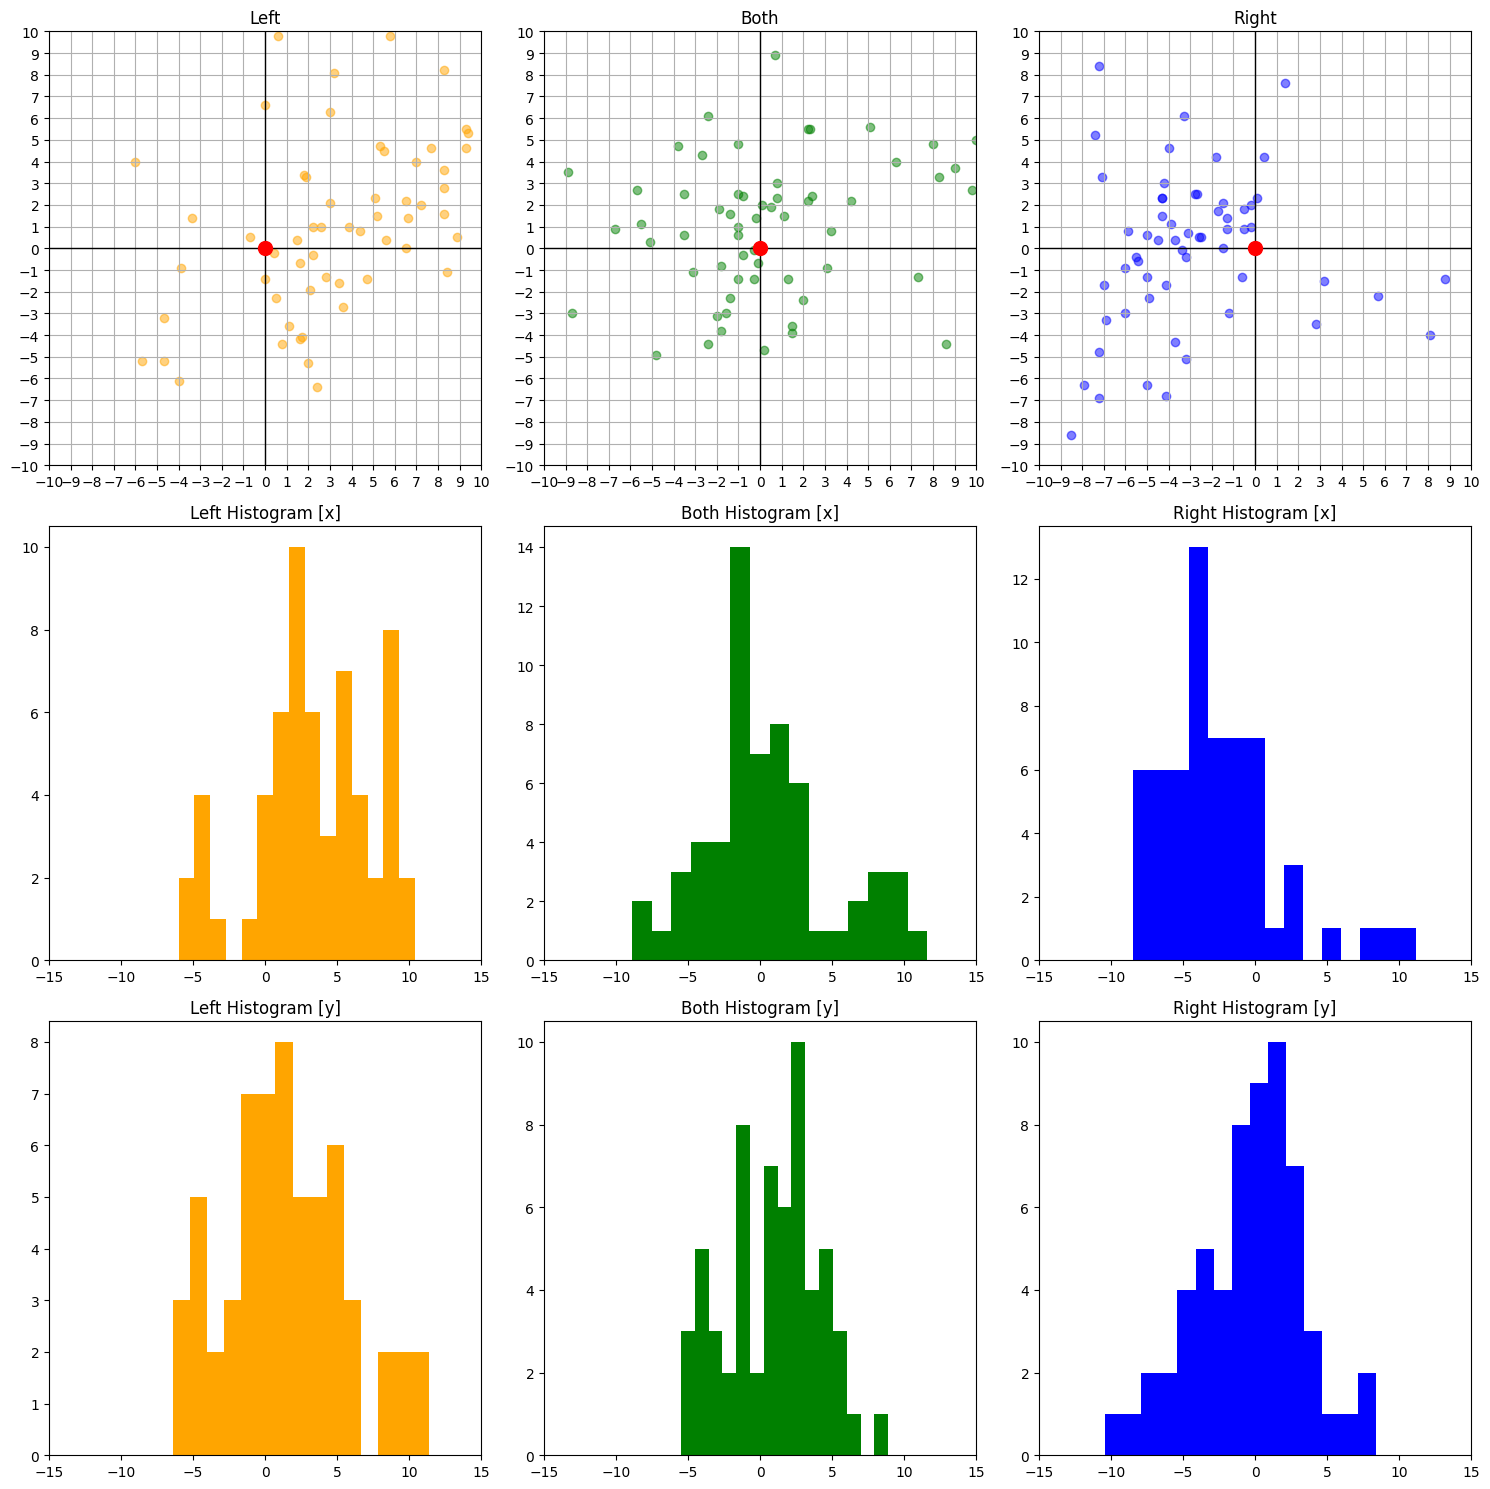

In [5]:
fix, ax = plt.subplots(nrows=3, ncols=3, figsize=(3 * 5, 3 * 5))

colors = {"Right": "blue", "Left": "orange", "Both": "green"}
for i, (hand, df_hand) in enumerate(
    [("Left", df_left), ("Both", df_both), ("Right", df_right)]
):
    # Scatter
    ax[0, i].scatter(
        df_hand["x [cm]"], df_hand["y [cm]"], color=colors[hand], label=hand, alpha=0.5
    )
    ax[0, i].set_title(hand)
    ax[0, i].set_xlim(-10, 10)
    ax[0, i].set_ylim(-10, 10)
    ax[0, i].set_xticks(np.arange(-10, 11, 1))
    ax[0, i].set_yticks(np.arange(-10, 11, 1))
    ax[0, i].axhline(0, color="black", linewidth=1)
    ax[0, i].axvline(0, color="black", linewidth=1)
    ax[0, i].grid(True)
    ax[0, i].scatter([0], [0], color="red", s=100, zorder=5)

    # X Histogram [x]
    ax[1, i].hist(df_hand["x [cm]"], bins=15, color=colors[hand])
    ax[1, i].set_title(f"{hand} Histogram [x]")
    ax[1, i].set_xlim(-15, 15)

    # Histogram [y]
    ax[2, i].hist(df_hand["y [cm]"], bins=15, color=colors[hand])
    ax[2, i].set_title(f"{hand} Histogram [y]")
    ax[2, i].set_xlim(-15, 15)


plt.tight_layout()
plt.show()

In [19]:
print("Left Hand:")
print(
    f"\t Mean(x): {round(np.mean(df_left['x [cm]']), 2)} cm; Std(x): {round(np.std(df_left['x [cm]']), 2)} cm"
)
print(
    f"\t Mean(y): {round(np.mean(df_left['y [cm]']), 2)} cm; Std(y): {round(np.std(df_left['y [cm]']), 2)} cm"
)
print("\n")
print("Both Hands:")
print(
    f"\t Mean(x): {round(np.mean(df_both['x [cm]']), 2)} cm; Std(x): {round(np.std(df_both['x [cm]']), 2)} cm"
)
print(
    f"\t Mean(y): {round(np.mean(df_both['y [cm]']), 2)} cm; Std(y): {round(np.std(df_both['y [cm]']), 2)} cm"
)
print("\n")
print("Right Hand:")
print(
    f"\t Mean(x): {round(np.mean(df_right['x [cm]']), 2)} cm; Std(x): {round(np.std(df_right['x [cm]']), 2)} cm"
)
print(
    f"\t Mean(y): {round(np.mean(df_right['y [cm]']), 2)} cm; Std(y): {round(np.std(df_right['y [cm]']), 2)} cm"
)

Left Hand:
	 Mean(x): 3.28 cm; Std(x): 4.03 cm
	 Mean(y): 1.38 cm; Std(y): 4.24 cm


Both Hands:
	 Mean(x): 0.47 cm; Std(x): 4.48 cm
	 Mean(y): 0.86 cm; Std(y): 3.21 cm


Right Hand:
	 Mean(x): -2.57 cm; Std(x): 4.03 cm
	 Mean(y): -0.33 cm; Std(y): 3.74 cm


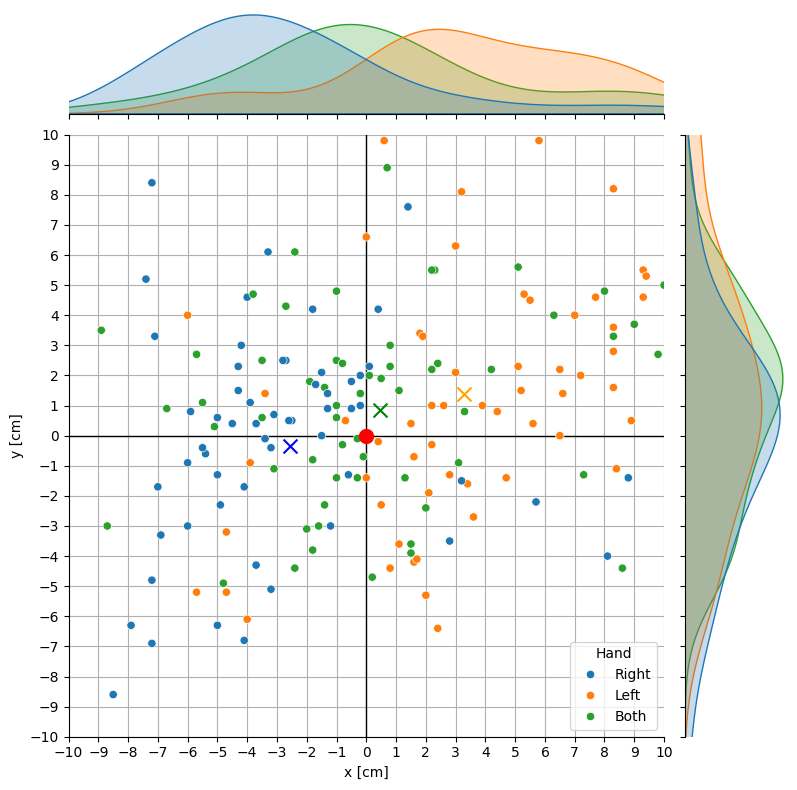

In [6]:
# Jointplot
g = sns.jointplot(
    data=df_raw, x="x [cm]", y="y [cm]", kind="scatter", hue="Hand", height=8, zorder=3
)

# Corrdinate System
g.ax_joint.set_xlim(-10, 10)
g.ax_joint.set_ylim(-10, 10)
g.ax_joint.set_xticks(np.arange(-10, 11, 1))
g.ax_joint.set_yticks(np.arange(-10, 11, 1))
g.ax_joint.axhline(0, color="black", linewidth=1)
g.ax_joint.axvline(0, color="black", linewidth=1)
g.ax_joint.grid(True)
g.ax_joint.scatter([0], [0], color="red", s=100, zorder=5)
g.ax_joint.scatter(
    mu_right[0],
    mu_right[1],
    marker="x",
    color="blue",
    s=100,
    label="Right Mean",
    zorder=5,
)
g.ax_joint.scatter(
    mu_left[0],
    mu_left[1],
    marker="x",
    color="orange",
    s=100,
    label="Left Mean",
    zorder=5,
)
g.ax_joint.scatter(
    mu_both[0],
    mu_both[1],
    marker="x",
    color="green",
    s=100,
    label="Both Mean",
    zorder=5,
)

plt.show()

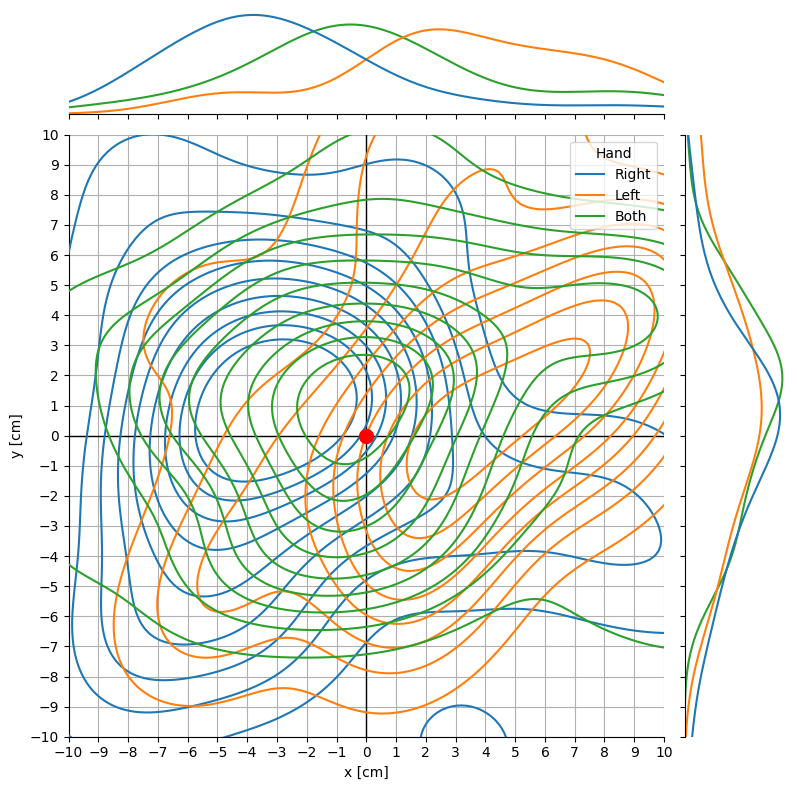

In [7]:
# Jointplot
g = sns.jointplot(
    data=df_raw, x="x [cm]", y="y [cm]", kind="kde", hue="Hand", height=8, zorder=3
)

# Corrdinate System
g.ax_joint.set_xlim(-10, 10)
g.ax_joint.set_ylim(-10, 10)
g.ax_joint.set_xticks(np.arange(-10, 11, 1))
g.ax_joint.set_yticks(np.arange(-10, 11, 1))
g.ax_joint.axhline(0, color="black", linewidth=1)
g.ax_joint.axvline(0, color="black", linewidth=1)
g.ax_joint.grid(True)
g.ax_joint.scatter([0], [0], color="red", s=100, zorder=5)

plt.show()

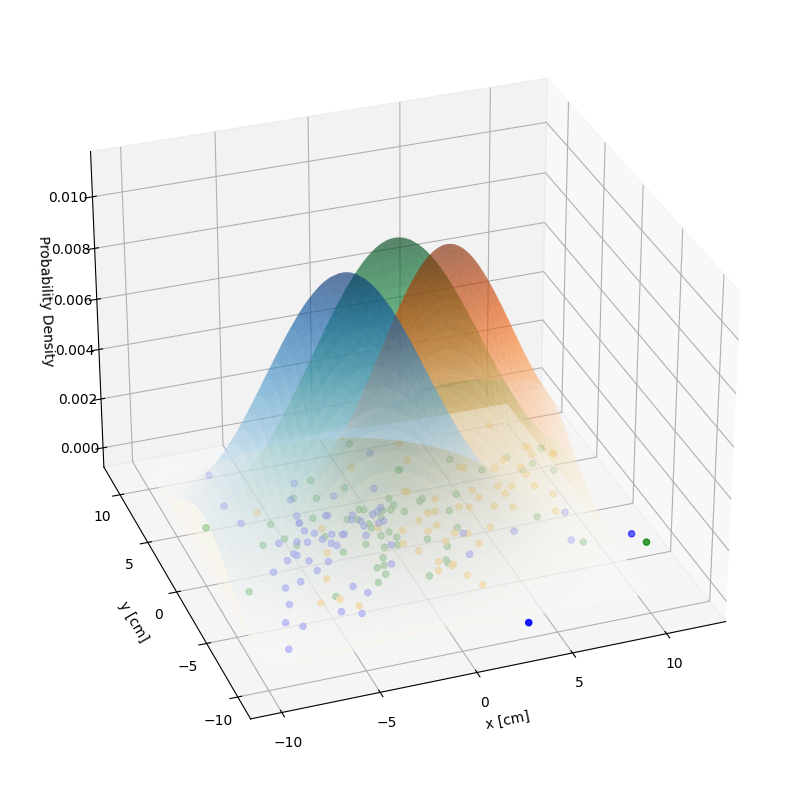

In [8]:
# Create Grid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Calculate 3D Surfaces
rv_right = multivariate_normal(mean=mu_right, cov=sigma_right)
Z_right = rv_right.pdf(pos)

rv_left = multivariate_normal(mean=mu_left, cov=sigma_left)
Z_left = rv_left.pdf(pos)

rv_both = multivariate_normal(mean=mu_both, cov=sigma_both)
Z_both = rv_both.pdf(pos)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the 3D Normal Distributions
ax.plot_surface(X, Y, Z_right, cmap="Blues", alpha=0.4)
ax.plot_surface(X, Y, Z_left, cmap="Oranges", alpha=0.4)
ax.plot_surface(X, Y, Z_both, cmap="Greens", alpha=0.4)

# Plot Scatter Points
ax.scatter(
    df_right["x [cm]"],
    df_right["y [cm]"],
    [0] * len(df_right["x [cm]"]),
    color="blue",
    s=20,
)
ax.scatter(
    df_left["x [cm]"],
    df_left["y [cm]"],
    [0] * len(df_left["x [cm]"]),
    color="orange",
    s=20,
)
ax.scatter(
    df_both["x [cm]"],
    df_both["y [cm]"],
    [0] * len(df_both["x [cm]"]),
    color="green",
    s=20,
)

# Adjust Angle
ax.view_init(elev=30, azim=-110)
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")
ax.set_zlabel("Probability Density")

plt.tight_layout()
plt.show()